In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
from bidder import *

In [3]:
from matplotlib import animation

In [4]:
import functools
import json
from time import sleep

In [5]:
account = "TLB99029472"
venue = "NUEX"
stock = "NTU"

header['X-Starfighter-Authorization'] = "c8bbc206d27988125aa25e396f2f290f22109dbe"

In [6]:
asks, bids, askSize, bidSize = [[0]*2000]*4
askmax, bidmax = [1]*2

In [7]:
def quote_updater(account, ws, message):
    global asks, bids, askSize, bidSize, askmax, bidmax
    
    message = json.loads(message)
    if 'quote' in message:
        quote = message['quote']
    else:
        return
    
    if 'ask' in quote:
        asks = asks[1:] + [quote['ask']]
        askSize = askSize[1:] + [quote['askSize']]
        if askSize[-1] > askmax:
            askmax = askSize[-1]
    else:
        asks = asks[1:] + [asks[-1]]
        askSize = askSize[1:] + [askSize[-1]]
    
    if 'bid' in quote:
        bids = bids[1:] + [quote['bid']]
        bidSize = bidSize[1:] + [quote['bidSize']]
        if bidSize[-1] > bidmax:
            bidmax = bidSize[-1]
    else:
        bids = bids[1:] + [bids[-1]]
        bidSize = bidSize[1:] + [bidSize[-1]]
    
    #print quote.get('ask', None), quote.get('bid', None)

In [8]:
thread = quote_websocket(account, venue, stock, functools.partial(quote_updater, account))

<IPython.core.display.Javascript object>


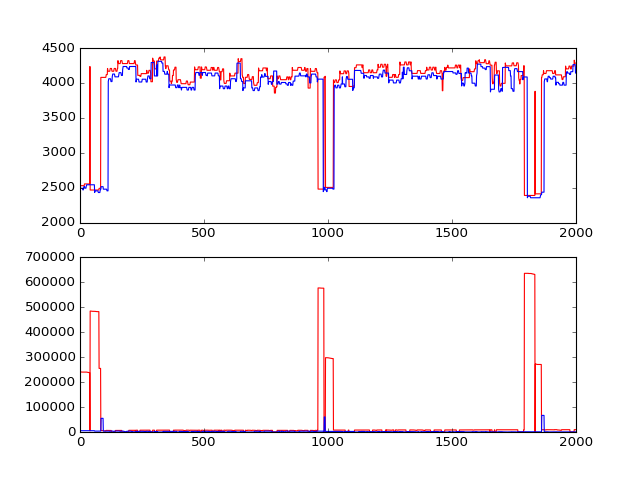

In [9]:
fig, ax = plt.subplots(2, sharex=True)

In [10]:
ax[0].clear()
ax[1].clear()

DEBUG:root:--- request header ---
DEBUG:root:GET /ob/api/ws/TLB99029472/venues/NUEX/tickertape/stocks/NTU HTTP/1.1
Upgrade: websocket
Connection: Upgrade
Host: api.stockfighter.io:443
Origin: http://api.stockfighter.io:443
Sec-WebSocket-Key: CimnYhJtJN31OUUNLwbcAA==
Sec-WebSocket-Version: 13


DEBUG:root:-----------------------
DEBUG:root:--- response header ---


In [11]:

a1, = ax[0].plot(asks, color="red")
a2, = ax[0].plot(bids, color="blue")
b1, = ax[1].plot(askSize, color="red")
b2, = ax[1].plot(bidSize, color="blue")

In [12]:
def update(i):
    ax[0].relim()
    ax[1].relim()

    ax[0].autoscale_view()
    ax[1].autoscale_view()
    
    a1.set_ydata(asks)
    a2.set_ydata(bids)
    b1.set_ydata(askSize)
    b2.set_ydata(bidSize)

    return a1, a2, b1, b2

In [13]:
ani = animation.FuncAnimation(fig, update, interval=50, blit=True)

In [14]:
draw()